## Import các thư viện cần thiết

In [ ]:
import os
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import spacy
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import random
from transformers import AutoTokenizer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir("/content/drive/MyDrive/2_PBL7/")

## Init

In [ ]:
number_of_walks = 1000

## Load data

In [ ]:
final_df = pd.read_csv('/content/drive/MyDrive/2_PBL7/SaveData/final_df.csv')
final_df.head(5)

abstract  \
0  A conflict between language and atomistic info...   
1  Selective representing and world-making We dis...   
2  Does classicism explain universality ? Argumen...   
3  Separate accounts go mainstream -LSB- investme...   
4  Evolving receptive-field controllers for mobil...   

                                     Abstract_inputs  \
0  ['a', 'conflict', 'between', 'language', 'and'...   
1  ['selective', 'representing', 'and', 'world', ...   
2  ['does', 'classic', '##ism', 'explain', 'unive...   
3  ['separate', 'accounts', 'go', 'mainstream', '...   
4  ['evolving', 'rec', '##eptive', '-', 'field', ...   

                                          BIO_labels  
0  ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...  
1  ['B', 'I', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...  
2  ['O', 'B', 'I', 'O', 'O', 'O', 'O', 'O', 'O', ...  
3  ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B', ...  
4  ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'B', 'I', ...

In [ ]:
# Đọc dữ liệu từ file data.csv
df = pd.read_csv('./CrawlData/papers_data.csv')

# In ra 5 dòng đầu tiên của dữ liệu
print(df['Abstract'].head())
print(df.iloc[0]['Abstract'])

0     A  bit  - serial  VLSI  neural  network  is  ...
1     How  does  the  connectivity  of a  neural  n...
2     The  Hopfield  neural  network.  model  for  ...
3     There is  presently great interest in the abi...
4     The  aim  of  this  paper  is  to  explore  t...
Name: Abstract, dtype: object
 A  bit  - serial  VLSI  neural  network  is  described  from  an  initial  architecture  for  a  synapse array through to silicon layout and board design.  The issues surrounding bit  - serial  computation,  and  analog/digital  arithmetic  are  discussed  and  the  parallel  development  of  a  hybrid  analog/digital  neural  network  is  outlined.  Learning  and  recall  capabilities  are  reported  for  the  bit  - serial  network  along  with  a  projected  specification  for  a  64  - neuron,  bit  - serial  board  operating  at 20 MHz.  This tech(cid:173) nique  is  extended  to  a  256  (2562  synapses)  network  with  an  update  time  of 3ms,  using  a  "paging"  technique  to

In [ ]:
df.head(5)

Year  Volume Pages Status                             Book Title  \
0  1987       0   NaN    NaN  Neural Information Processing Systems   
1  1987       0   NaN    NaN  Neural Information Processing Systems   
2  1987       0   NaN    NaN  Neural Information Processing Systems   
3  1987       0   NaN    NaN  Neural Information Processing Systems   
4  1987       0   NaN    NaN  Neural Information Processing Systems   

                                               Title  \
0                         Bit-Serial Neural Networks   
1                        Connectivity Versus Entropy   
2        The Hopfield Model with Multi-Level Neurons   
3                               How Neural Nets Work   
4  Spatial Organization of Neural Networks: A Pro...   

                                             Authors      Editors  \
0             Murray Alan, Smith Anthony, Butler Zoe  D. Anderson   
1                                  Abu-Mostafa Yaser  D. Anderson   
2                                   Fleisher Michael  D. Anderson   
3                        Lapedes Alan, Farber Robert  D. Anderson   
4  Stafylopatis Andreas, Dikaiakos Marios, Kontor...  D. Anderson   

                      Publishers  \
0  American Institute of Physics   
1  American Institute of Physics   
2  American Institute of Physics   
3  American Institute of Physics   
4  American Institute of Physics   

                                            Main Url  \
0  https://proceedings.neurips.cc/paper_files/pap...   
1  https://proceedings.neurips.cc/paper_files/pap...   
2  https://proceedings.neurips.cc/paper_files/pap...   
3  https://proceedings.neurips.cc/paper_files/pap...   
4  https://proceedings.neurips.cc/paper_files/pap...   

                                        Metadata Url  \
0  https://proceedings.neurips.cc/paper_files/pap...   
1  https://proceedings.neurips.cc/paper_files/pap...   
2  https://proceedings.neurips.cc/paper_files/pap...   
3  https://proceedings.neurips.cc/paper_files/pap...   
4  https://proceedings.neurips.cc/paper_files/pap...   

                                           Paper Url Supplemental Url  \
0  https://proceedings.neurips.cc/paper_files/pap...              NaN   
1  https://proceedings.neurips.cc/paper_files/pap...              NaN   
2  https://proceedings.neurips.cc/paper_files/pap...              NaN   
3  https://proceedings.neurips.cc/paper_files/pap...              NaN   
4  https://proceedings.neurips.cc/paper_files/pap...              NaN   

  Review Url MetaReview Url AuthorFeedback Url  Reviews And Public Comment  \
0        NaN            NaN                NaN                         NaN   
1        NaN            NaN                NaN                         NaN   
2        NaN            NaN                NaN                         NaN   
3        NaN            NaN                NaN                         NaN   
4        NaN            NaN                NaN                         NaN   

                                            Abstract  
0   A  bit  - serial  VLSI  neural  network  is  ...  
1   How  does  the  connectivity  of a  neural  n...  
2   The  Hopfield  neural  network.  model  for  ...  
3   There is  presently great interest in the abi...  
4   The  aim  of  this  paper  is  to  explore  t...

In [ ]:
import pandas as pd

# Tạo hai DataFrame example
df1 = final_df[['abstract']]
df1 = df1.rename(columns={'abstract': 'Abstract'})
df2 = df[['Abstract']]

# df2 = pd.DataFrame({'Abstract': ['Abstract 4', 'Abstract 5', 'Abstract 6']})

# Gộp hai DataFrame và chỉ giữ lại trường Abstract
concatenated_df = pd.concat([df1, df2], ignore_index=True)

print(concatenated_df)


                                                Abstract
0      A conflict between language and atomistic info...
1      Selective representing and world-making We dis...
2      Does classicism explain universality ? Argumen...
3      Separate accounts go mainstream -LSB- investme...
4      Evolving receptive-field controllers for mobil...
...                                                  ...
23024   As graph neural networks (GNNs) struggle with...
23025  Combining test statistics from independent tri...
23026   A crucial problem in reinforcement learning i...
23027  Effectively modeling long spatiotemporal seque...
23028   Current image steganography techniques are ma...

[23029 rows x 1 columns]


## Xây dựng Co-occurrence network

In [ ]:
bert_model_name = "google-bert/bert-base-uncased"

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(bert_model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
def tokenizerSplit(text):
  encoding = tokenizer(text, return_tensors='pt')
  decoding = [tokenizer.decode(idx) for idx in encoding['input_ids'][0]]
  return decoding[1:-1]

In [ ]:
def NodeEdgeFromSentenCe(sentence, nlp):
    # sử dụng xử lý nlp cho sentence
    doc = nlp(sentence)
    # danh sách các cụm danh từ trong câu
    noun_phrases = []
    for chunk in doc.noun_chunks:
        # Filter out unimportant words
        phrase_tokens = [token.text for token in chunk if not token.is_stop]
        if phrase_tokens:
            noun_phrases.append(" ".join(phrase_tokens))
    # các cặp từ và quan hệ của chúng
    word_pairs = []
    relations = []
    ## tạo quan hệ bên trong cụm danh từ
    for noun in noun_phrases:
        tokens = tokenizerSplit(noun)
        # tokens = noun.split(' ')
        # print(tokens)

        # Lặp qua danh sách từ để tạo các cặp
        for i in range(len(tokens)):
            for j in range(i + 1, len(tokens)):
                # Thêm cặp từ vào mảng
                word_pairs.append([tokens[i], tokens[j]])
                relations.append('PN')
    # tạo quan hệ bên trong câu
    for i in range(len(noun_phrases)):
        for j in range(i+1, len(noun_phrases)):
            i_tokens = tokenizerSplit(noun_phrases[i])
            j_tokens = tokenizerSplit(noun_phrases[j])
            # i_tokens = noun_phrases[i].split(' ')
            # j_tokens = noun_phrases[j].split(' ')
            for i_sub in range(len(i_tokens)):
                for j_sub in range(len(j_tokens)):
                    word_pairs.append([i_tokens[i_sub], j_tokens[j_sub]])
                    relations.append('SE')
    return {"word_pairs": word_pairs, "relations": relations}

In [ ]:
nltk.download('punkt')
nlp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import re
def NodeEdgeFromAbstract(abstract, nlp):
    # EdgeNode in abstract
    abs_word_pairs = []
    abs_relations = []
    for sentence in abstract.split('.'):
        text = sentence.strip()
        if text == '': continue
        normalized_text = re.sub(r'\s+', ' ', text) #câu sau khi xử lý
        # print(normalized_text)
        sen_edgenode = NodeEdgeFromSentenCe(normalized_text, nlp)
        abs_word_pairs.extend(sen_edgenode['word_pairs'])
        abs_relations.extend(sen_edgenode['relations'])
        # print(len(abs_word_pairs))
    return {'abs_word_pairs': abs_word_pairs, 'abs_relations': abs_relations}

In [ ]:
full_word_pairs = []
full_relations = []
for i in range(len(concatenated_df)):
    input = concatenated_df.iloc[i]['Abstract']
    abs_edgenode = NodeEdgeFromAbstract(input, nlp)
    full_word_pairs.extend(abs_edgenode['abs_word_pairs'])
    full_relations.extend(abs_edgenode['abs_relations'])
    print(len(full_word_pairs))
    break
# full_edgenode
full_edgenode = {'full_word_pairs': full_word_pairs, 'full_relations': full_relations}

1131


In [ ]:
for i, xxx in enumerate(full_edgenode['full_relations']):
  if xxx == 'PN':
    print(i, xxx)
    print(full_edgenode['full_word_pairs'][i])
  # break

In [ ]:
import json
# Đường dẫn đến tệp JSON để lưu trữ
file_path = './CrawlData/new_full_edgenode_full_data.json'
# Mở tệp JSON để ghi dữ liệu
with open(file_path, 'w') as json_file:
    json.dump(full_edgenode, json_file)
# Mở tệp JSON để đọc dữ liệu
with open(file_path, 'r') as json_file:
    full_edgenode = json.load(json_file)

# Truy cập dữ liệu đã tải
full_word_pairs = full_edgenode['full_word_pairs']
full_relations = full_edgenode['full_relations']

# In dữ liệu đã tải
print("full_word_pairs:", len(full_word_pairs))
print("full_relations:", len(full_relations))
del full_edgenode

full_word_pairs: 21815249
full_relations: 21815249


In [ ]:
rare_keys_full = []
for i in range(0, len(full_word_pairs), 1000000):
  if (i+1000000<len(full_word_pairs)):
    full_word_pairs_split = full_word_pairs[i:i+1000000]
    full_relations_split = full_relations[i:i+1000000]
  else:
    full_word_pairs_split = full_word_pairs[i:-1]
    full_relations_split = full_relations[i:-1]
  full_word_pairs_split = np.array(full_word_pairs_split)
  full_relations_split = np.array(full_relations_split)
  full_data = np.column_stack((full_word_pairs_split, full_relations_split))

  # Khởi tạo từ điển để lưu số lần xuất hiện của mỗi bộ 3
  pair_count = {}
  # Duyệt qua mỗi bộ 3 trong mảng full_data
  for row in full_data:
    word1, word2, label = row
    # Lấy bộ 3 làm key
    key = (word1, word2, label)
    # Kiểm tra xem bộ 3 đã tồn tại chưa
    if key not in pair_count:
      # Chưa tồn tại thì gán giá trị 0
      pair_count[key] = 0
    # Tăng giá trị của key lên 1
    pair_count[key] += 1

  THRESHOLD = 0
  rare_keys = np.array([key for key,count in pair_count.items() if count > THRESHOLD])
  rare_keys_full.extend(rare_keys)

In [ ]:
print(len(rare_keys_full))  # thres = 3 => 823009  | thres = 2 => 1415493

847


In [ ]:
# extract token 1
source = [i[0] for i in rare_keys_full]
# extract token 2
target = [i[1] for i in rare_keys_full]
relates = [i[2] for i in rare_keys_full]
kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relates})

In [ ]:
kg_df.head(10)

source       target edge
0     atom      ##istic   PN
1     atom  information   PN
2  ##istic  information   PN
3     fred           dr   PN
4     fred        ##ets   PN
5     fred         ##ke   PN
6       dr        ##ets   PN
7       dr         ##ke   PN
8    ##ets         ##ke   PN
9    jerry            f   PN

In [ ]:
kg_df.to_csv('./CrawlData/NewKnowLedgeDF_th2_full.csv', index=False)

In [ ]:
kg_df = pd.read_csv('./CrawlData/NewKnowLedgeDF_th2_full.csv')

## Tạo đối tượng graph: Sử dụng NetworkX

In [ ]:
# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target",
                          edge_attr=True, create_using=nx.MultiDiGraph())

In [ ]:
print(G)

MultiDiGraph with 65 nodes and 847 edges


In [ ]:
# 15000 pairs   = 1/12 của toàn bộ
plt.figure(figsize=(8,8))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [ ]:
# # 15000 pairs   = 1/12 của toàn bộ
# plt.figure(figsize=(12,12))

# pos = nx.spring_layout(G)
# nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
# plt.show()

### Hidden

In [ ]:
# full_word_pairs_split = full_word_pairs[0:1000000]
# full_relations_split = full_relations[0:1000000]
# # full_word_pairs_split = full_word_pairs
# # full_relations_split = full_relations
# del full_word_pairs
# del full_relations

In [ ]:
# full_word_pairs_split = np.array(full_word_pairs_split)
# full_relations_split = np.array(full_relations_split)

In [ ]:
# print(full_word_pairs_split.shape)
# print(full_relations_split.shape)

# full_data = np.column_stack((full_word_pairs_split, full_relations_split))
# print(full_data.shape)

In [ ]:
# import numpy as np

# # Khởi tạo từ điển để lưu số lần xuất hiện của mỗi bộ 3
# pair_count = {}

# # Duyệt qua mỗi bộ 3 trong mảng full_data
# for row in full_data:
#   word1, word2, label = row

#   # Lấy bộ 3 làm key
#   key = (word1, word2, label)

#   # Kiểm tra xem bộ 3 đã tồn tại chưa
#   if key not in pair_count:
#     # Chưa tồn tại thì gán giá trị 0
#     pair_count[key] = 0

#   # Tăng giá trị của key lên 1
#   pair_count[key] += 1

# # pair_count giờ chứa số lần xuất hiện của mỗi bộ 3 trong full_data

In [ ]:
# THRESHOLD = 5

# rare_keys = np.array([key for key,count in pair_count.items() if count > THRESHOLD])

# print(rare_keys.shape)
# print(rare_keys[1000])

In [ ]:
# # create a directed-graph from a dataframe
# G=nx.from_pandas_edgelist(kg_df, "source", "target",
#                           edge_attr=True, create_using=nx.MultiDiGraph())

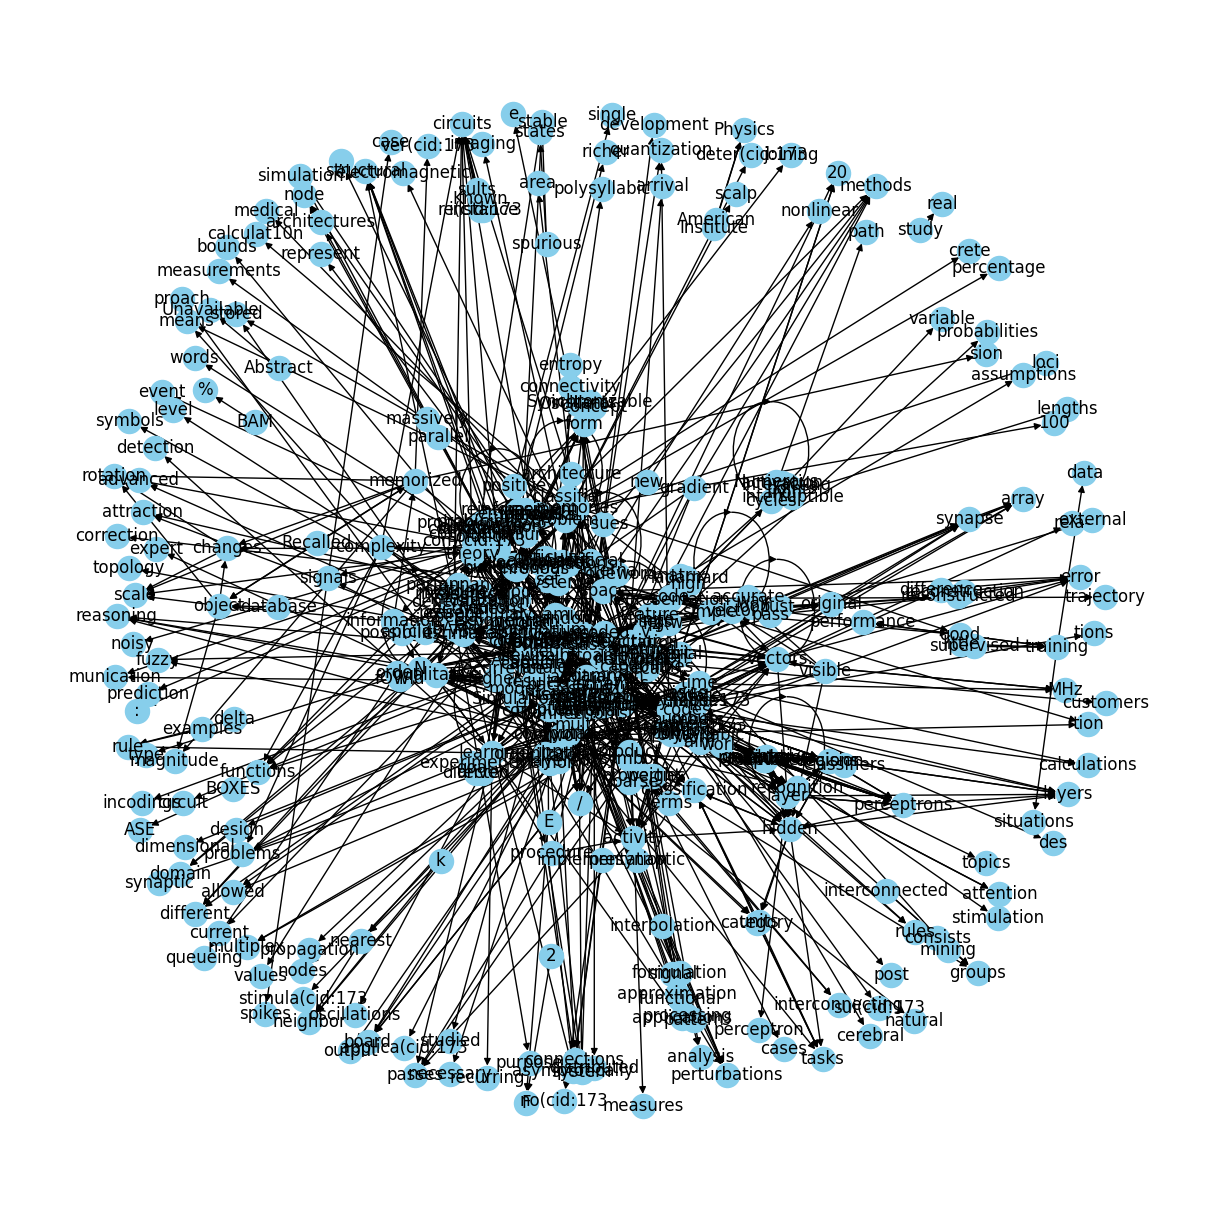

In [ ]:
# plt.figure(figsize=(12,12))

# pos = nx.spring_layout(G)
# nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
# plt.show()

đây là đồ thị thể hiện knowledge graph

Input: Nhận vào một câu văn bản cần phân tích

In [ ]:
input = df.iloc[0]['Abstract']
print(input)
print(type(input))
import re
text = input.split(".")[0].strip()
normalized_text = re.sub(r'\s+', ' ', text)
print(normalized_text)

 A  bit  - serial  VLSI  neural  network  is  described  from  an  initial  architecture  for  a  synapse array through to silicon layout and board design.  The issues surrounding bit  - serial  computation,  and  analog/digital  arithmetic  are  discussed  and  the  parallel  development  of  a  hybrid  analog/digital  neural  network  is  outlined.  Learning  and  recall  capabilities  are  reported  for  the  bit  - serial  network  along  with  a  projected  specification  for  a  64  - neuron,  bit  - serial  board  operating  at 20 MHz.  This tech(cid:173) nique  is  extended  to  a  256  (2562  synapses)  network  with  an  update  time  of 3ms,  using  a  "paging"  technique  to  time  - multiplex  calculations  through  the  synapse  array. 
<class 'str'>
A bit - serial VLSI neural network is described from an initial architecture for a synapse array through to silicon layout and board design


Phân tách câu thành các từ: Sử dụng thư viện NLTK hoặc spaCy

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
doc = nlp(normalized_text)  #example

for tok in doc:
  print(tok.text, "...", tok.dep_, "...", tok.pos_)

In [ ]:
# Get noun phrases
noun_phrases = []
for chunk in doc.noun_chunks:
    # Filter out unimportant words
    phrase_tokens = [token.text for token in chunk if not token.is_stop]
    if phrase_tokens:
        noun_phrases.append(" ".join(phrase_tokens))

# Print noun phrases
print("Noun Phrases:")
for phrase in noun_phrases:
    print(phrase)

Noun Phrases:
bit - serial VLSI neural network
initial architecture
synapse array
silicon layout
board design


Nhận xét:
- Hiện tại đang là code lấy chủ ngữ và tân ngữ trong câu => kết quả không tốt.
- Lý do: do các câu trong abstract của bài báo khoa học thường rất phức tạp, và dài. Việc bỏ đi gần như toàn bộ câu (chỉ lấy S, O) là không nên.
- Giải pháp: Lấy các cụm danh từ trong câu sẽ tốt hơn.

Xây dựng nút và cạnh: Mỗi từ duy nhất trong câu sẽ là 1 nút, cạnh sẽ là sự liên quan giữa các từ đó

In [ ]:
# extract subject
source = [i[0] for i in word_pairs]

# extract object
target = [i[1] for i in word_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

Đếm số lần các cặp từ xuất hiện cùng nhau: Dùng dict lưu {từ1, từ2}: count

Trả về kết quả graph: Đại diện là embedding graph của câu văn bản input

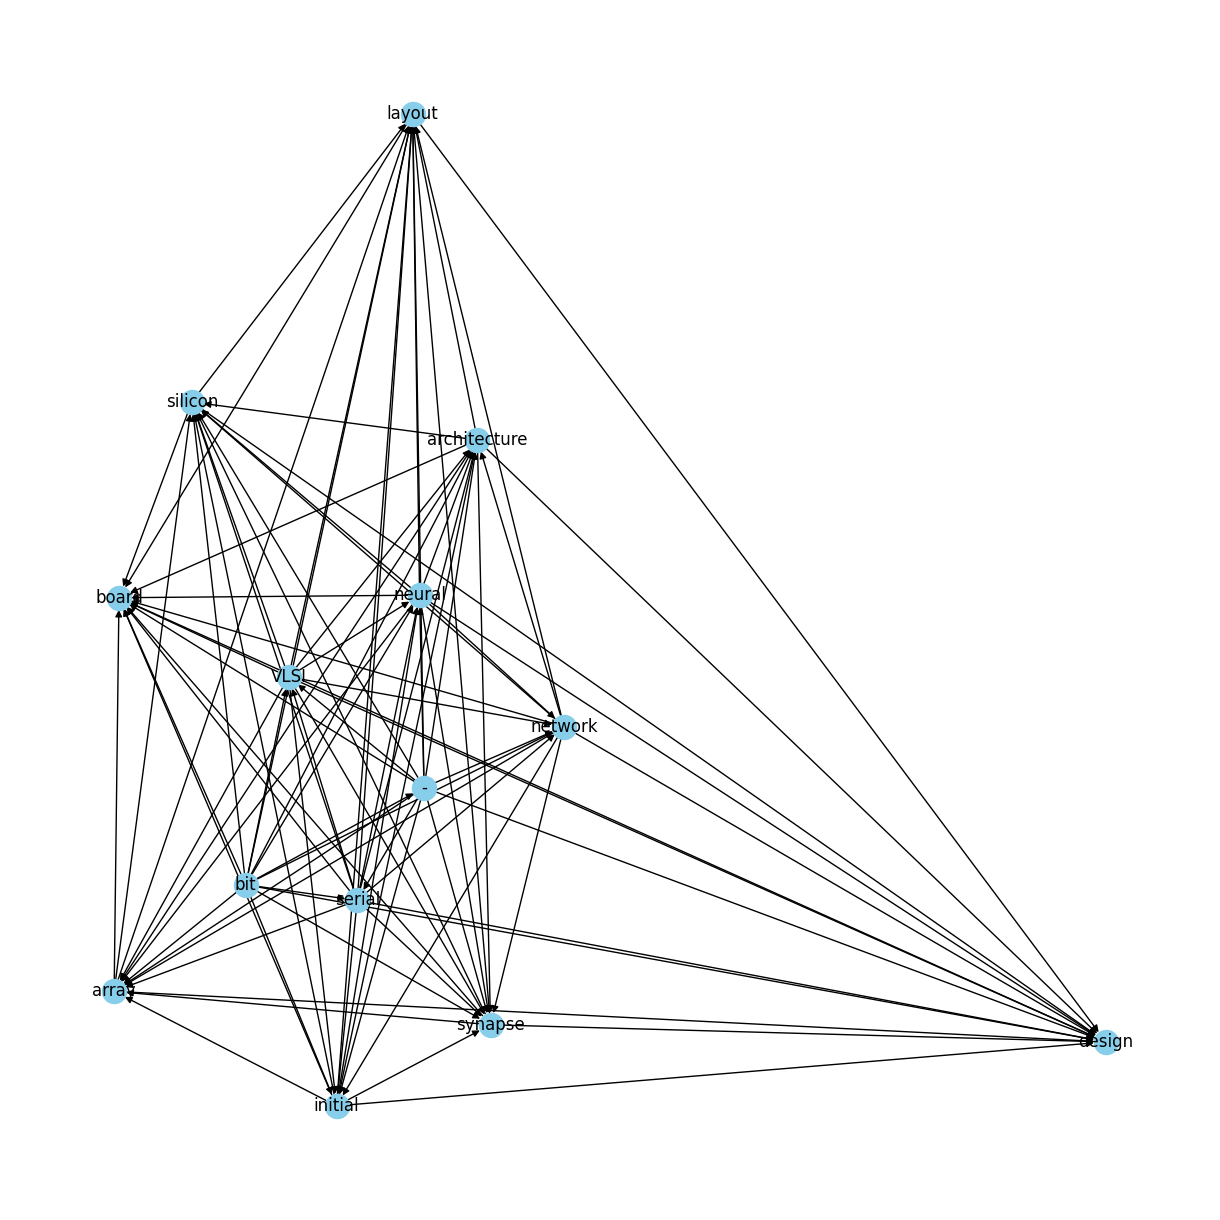

In [ ]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

### Unhidden

## Tìm tập chủ đạo (dominating set)

## Cur

In [ ]:
G_copy = nx.MultiDiGraph(G)
print(G_copy)
print(G)

MultiDiGraph with 65 nodes and 847 edges
MultiDiGraph with 65 nodes and 847 edges


In [ ]:
random.seed(42)

D = []
while G_copy.nodes:
    node = random.choice(list(G_copy.nodes))
    neighbors = list(G_copy.neighbors(node))
    D.append(node)
    G_copy.remove_node(node)
    G_copy.remove_nodes_from(neighbors)

del G_copy

In [ ]:
print(len(D))

16


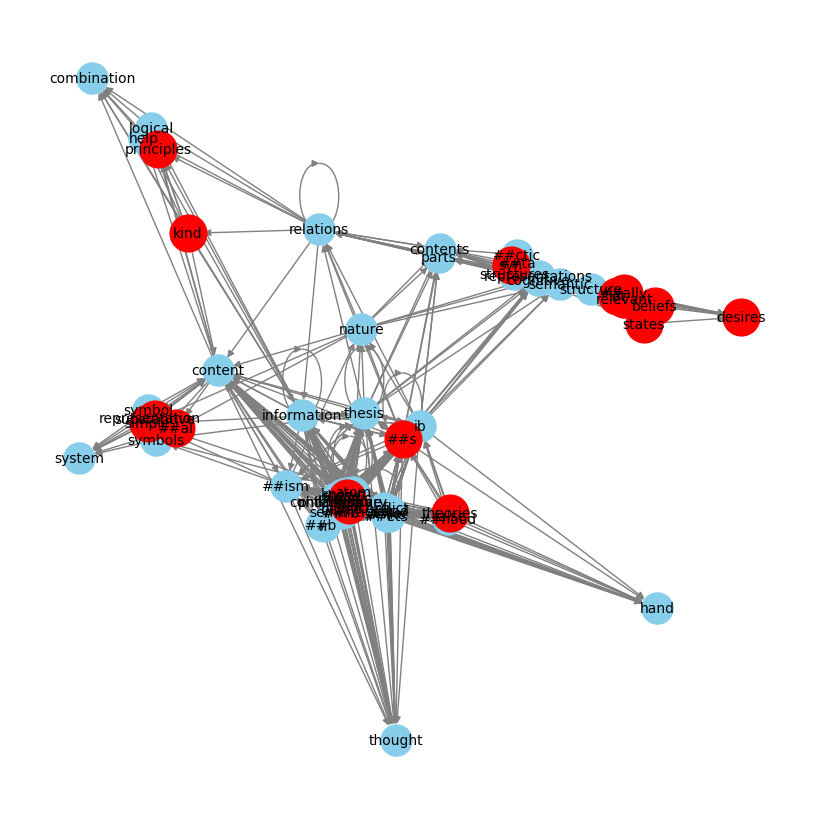

In [ ]:
# Draw the graph with the dominating set highlighted
plt.figure(figsize=(8, 8))

# Draw all nodes and edges
nx.draw(G, pos=pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=500, font_size=10)

# Highlight the dominating set nodes
nx.draw_networkx_nodes(G, pos, nodelist=D, node_color='red', node_size=700)

plt.show()

## Xây dựng Random Walks

In [ ]:
LR = 5 # Độ dài tối đa của mỗi random walk
random_walks = []
i = 0
while i<number_of_walks:
  random_walk = [random.choice(D)]
  two_dominating = False
  while len(random_walk) < LR:
    current = random_walk[-1]
    neighbors = list(G.neighbors(current))
    if neighbors:
      next_node = random.choice(neighbors)
      random_walk.append(next_node)
    else:
      break

    if next_node in D:
      two_dominating = True
  if ((len(random_walk)==LR) and two_dominating):
      random_walks.append(random_walk)
      i+=1

In [ ]:
print(len(random_walks))
for item in random_walks[0:10]:
  print(item)

1000
['relevant', 'representations', 'structures', 'structure', 'beliefs']
['syn', 'contents', 'semantic', 'structure', 'desires']
['lot', 'semantic', 'cognitive', 'semantic', '##ally']
['simple', 'content', 'atom', 'content', '##al']
['simple', 'symbols', 'representation', '##al', 'system']
['fred', 'l', '##s', 'mind', 'l']
['lot', 'structure', 'cognitive', 'representations', 'beliefs']
['fred', 'f', '##hood', '##s', 'relations']
['syn', 'structures', 'structure', 'beliefs', 'desires']
['fred', 'thesis', 'symbols', '##al', 'system']


## Huấn luyện mạng nơ-ron tích cực skip-gram để học vector embedding cho các nút

### Word2Vec

In [ ]:
VECTOR_SIZE = 300

Khởi tạo model skip-gram

In [ ]:
from sklearn.preprocessing import StandardScaler
from gensim.models import Word2Vec

modelwv = Word2Vec(min_count=1,
                  window=5,
                  vector_size=VECTOR_SIZE, # chiều vector đầu ra
                  sample=1e-3,
                  negative=5,
                  workers=4)

Huấn luyện model

In [ ]:
modelwv.build_vocab(random_walks)
modelwv.train(random_walks, total_examples=modelwv.corpus_count, epochs=30)

(12920519, 15000000)

Lấy vector embedding của các nút

In [ ]:
node_vectors = {}
for node in G.nodes():
  if str(node) not in modelwv.wv.key_to_index:
    node_vectors[node] = np.zeros(VECTOR_SIZE)
  else:
    node_vectors[node] = modelwv.wv.get_vector(str(node))

print(len(G.nodes()))
print(len(node_vectors))

9232
9232


In [ ]:
count = 0
for key, value in node_vectors.items():
  print(key, value)
  count += 1
  print(len(value))
  if count >= 2:
    break

- [ 0.1395645   0.19786793  0.15616244  0.2691465   0.21937452 -0.6546626
 -0.01244262  0.3555777  -0.2795559   0.18638155 -0.11099516 -0.18283491
 -0.03569407  0.0187717  -0.45679638 -0.24163987  0.11486288  0.09898909
  0.06215064 -0.29720253  0.12799568  0.13259634  0.31901702 -0.09859452
  0.25894496 -0.18516836 -0.3548374   0.19240579  0.25084132 -0.19027814
 -0.4059316   0.15751444  0.32488942 -0.0261288  -0.021079   -0.09722716
 -0.11639587 -0.31590843  0.70154095 -0.02854035 -0.39073658  0.40623337
 -0.2111306  -0.12909554 -0.02118879  0.11951213  0.1188291   0.3791701
  0.12985933  0.06979113 -0.55613315 -0.30523792 -0.41658893  0.17017122
  0.02551184  0.24977167  0.22679485 -0.03688909 -0.3741066   0.11416693
 -0.5487692  -0.20505945 -0.29550064 -0.2973669  -0.39234772 -0.1853849
  0.26962444  0.22674373 -0.33106795 -0.19521263 -0.07526183  0.4440349
 -0.07767151 -0.04779621  0.02823209  0.24625826  0.4091269  -0.24221343
 -0.49610895  0.21496418 -0.03685911 -0.22605361  0.4

In [ ]:
import pickle

with open(f'word2vec_vectors_{VECTOR_SIZE}_th3_1e5_full.pkl', 'wb') as f:
  pickle.dump(node_vectors, f)

### Fasttext

In [ ]:
from gensim.models import FastText

modelft = FastText(min_count=1,
                  window=5,
                  vector_size=VECTOR_SIZE,
                  sample=1e-3,
                  negative=5,
                  workers=4)

In [ ]:
modelft.build_vocab(random_walks)
modelft.train(random_walks, total_words=modelft.corpus_total_words, epochs=30)

(12920378, 15000000)

In [ ]:
node_vectors_ft = {}
for node in G.nodes():
  node_vectors_ft[node] = modelft.wv[str(node)]
print(len(G.nodes()))
print(len(node_vectors_ft))

9232
9232


In [ ]:
count = 0
for key, value in node_vectors_ft.items():
  print(key, value)
  count += 1
  print(len(value))
  if count >= 10:
    break

- [ 2.4021482e+00  6.5037864e-01 -3.9087787e+00  3.2112672e+00
 -3.5508611e+00 -5.6783686e+00 -3.0730034e-03  2.5646262e+00
 -4.0943108e+00  1.2385688e+00 -6.5293348e-01 -2.9956586e+00
  1.8942366e+00  2.4640653e-01  1.3467219e+00  1.4190642e+00
  1.2358218e+00  4.5611305e+00 -5.8789730e-01  2.0619946e+00
  2.1240761e+00 -1.7129425e+00 -1.3898329e+00  2.2789881e+00
  6.6487920e-01  2.7434108e-01 -7.7299035e-01  1.2152922e+00
  6.1083871e-01  1.3555436e+00  1.0792712e+00 -1.8089750e+00
 -1.7459676e-01 -2.2903039e-01  2.9471364e+00  1.5933752e+00
 -4.0549698e-01 -4.2465987e+00 -1.4589450e+00 -3.5275948e+00
 -2.2701781e+00  4.0634060e+00  9.4555624e-02  1.6453215e+00
  4.8490834e-01 -4.7793713e+00 -3.4831486e+00 -3.5455670e+00
 -2.8383991e-01 -1.1726304e+00 -9.5730048e-01  1.5416985e+00
 -3.3518054e+00 -1.4350713e+00  3.0152156e+00  4.3249774e-01
 -1.5557072e+00  9.6575201e-01  1.8187128e+00  2.4053308e-01
 -8.6329806e-01 -2.2283111e+00 -2.0268359e+00 -2.1688046e+00
 -2.5104945e+00  2.340

In [ ]:
import pickle

with open(f'fasttext_vectors_{VECTOR_SIZE}_th3_1e5_full.pkl', 'wb') as f:
  pickle.dump(node_vectors_ft, f)

### Combine Word2Vec and Fasttext

In [ ]:
combined_vectors = {}
for node in node_vectors:
  combined_vector = np.concatenate((node_vectors[node],
                                      node_vectors_ft[node]), axis=0)
  combined_vectors[node] = combined_vector

In [ ]:
count = 0
for key, value in combined_vectors.items():
  print(key, value)
  count += 1
  print(len(value))
  if count >= 10:
    break

- [ 1.39564499e-01  1.97867930e-01  1.56162441e-01  2.69146502e-01
  2.19374523e-01 -6.54662609e-01 -1.24426242e-02  3.55577707e-01
 -2.79555887e-01  1.86381549e-01 -1.10995159e-01 -1.82834908e-01
 -3.56940702e-02  1.87716987e-02 -4.56796378e-01 -2.41639867e-01
  1.14862882e-01  9.89890918e-02  6.21506386e-02 -2.97202528e-01
  1.27995685e-01  1.32596344e-01  3.19017023e-01 -9.85945165e-02
  2.58944958e-01 -1.85168356e-01 -3.54837388e-01  1.92405790e-01
  2.50841320e-01 -1.90278143e-01 -4.05931592e-01  1.57514438e-01
  3.24889421e-01 -2.61288006e-02 -2.10790038e-02 -9.72271636e-02
 -1.16395868e-01 -3.15908432e-01  7.01540947e-01 -2.85403505e-02
 -3.90736580e-01  4.06233370e-01 -2.11130604e-01 -1.29095539e-01
 -2.11887918e-02  1.19512133e-01  1.18829101e-01  3.79170090e-01
  1.29859328e-01  6.97911307e-02 -5.56133151e-01 -3.05237919e-01
 -4.16588932e-01  1.70171216e-01  2.55118366e-02  2.49771670e-01
  2.26794854e-01 -3.68890874e-02 -3.74106586e-01  1.14166930e-01
 -5.48769176e-01 -2.050

In [ ]:
import pickle

with open(f'combined_vectors_{VECTOR_SIZE*2}_th3_1e5_full.pkl', 'wb') as f:
  pickle.dump(combined_vectors, f)

## Đánh giá mô hình và embedding graph